https://towardsdatascience.com/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import statsmodels.stats.api as sms

Text(0.5, 1.0, 'OLS Regression')

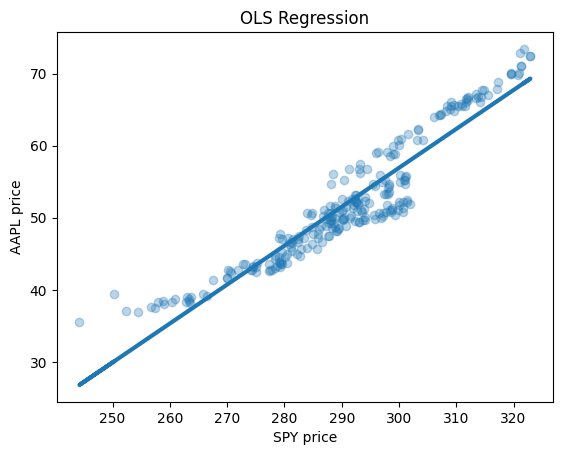

In [7]:
AAPL_price = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/Other/data/AAPL.csv')
SPY_price = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/Other/data/SPY.csv')

X = sm.add_constant(SPY_price['Close'])
model = sm.OLS(AAPL_price['Close'], X)
results = model.fit()

plt.scatter(SPY_price['Close'], AAPL_price['Close'], alpha=0.3)
y_predict = results.params[0] + results.params[1]*SPY_price['Close']
plt.plot(SPY_price['Close'], y_predict, linewidth=3)

# plt.xlim(240,350)
# plt.ylim(100,350)
plt.xlabel('SPY price')
plt.ylabel('AAPL price')
plt.title('OLS Regression')

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2040.
Date:                Mon, 01 May 2023   Prob (F-statistic):          3.06e-122
Time:                        11:13:00   Log-Likelihood:                -621.25
No. Observations:                 252   AIC:                             1246.
Df Residuals:                     250   BIC:                             1254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -104.9292      3.480    -30.149      0.000    -111.784     -98.075
Close          0.5395      0.012     45.169      0.000       0.516       0.563
==============================================================================
Omnibus:                        0.703   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.815
Skew:                           0.066   Prob(JB):                        0.665
Kurtosis:                       2.755   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
residual = AAPL_price['Close'] - results.params[0] - results.params[1]*SPY_price['Close']

print('p value of Jarque-Bera test is: ', stats.jarque_bera(residual)[1])
print('p value of Shapiro-Wilk test is: ', stats.shapiro(residual)[1])
print('p value of Kolmogorov-Smirnov test is: ', stats.kstest(residual, 'norm')[1])

p value of Jarque-Bera test is:  0.6652639082454446
p value of Shapiro-Wilk test is:  0.004045522306114435
p value of Kolmogorov-Smirnov test is:  1.2837077472388698e-17


In [14]:
print('p value of Goldfeld–Quandt test is: ', sms.het_goldfeldquandt(results.resid, results.model.exog)[1])
print('p value of Breusch–Pagan test is: ', sms.het_breuschpagan(results.resid, results.model.exog)[1])
print('p value of White test is: ', sms.het_white(results.resid, results.model.exog)[1])

p value of Goldfeld–Quandt test is:  1.0824985052800395e-19
p value of Breusch–Pagan test is:  0.6446295085854793
p value of White test is:  6.017185277950314e-08


In [15]:
print('The Durbin-Watson statistic is: ', sms.durbin_watson(results.resid))
print('p value of Breusch-Godfrey test is: ', sms.acorr_breusch_godfrey(results,nlags=1)[3])

The Durbin-Watson statistic is:  0.08526003709927484
p value of Breusch-Godfrey test is:  2.3611540218709375e-114
